<a href="https://colab.research.google.com/github/oldairjsilva/IGTI/blob/main/Plano_saude_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol. Para isso, vamos seguir as etapas do processamento do Big Data

Coleta de dados(1) >> Preparação de dados(2) >> Análise de dados(3) >> Modo Analítico(4) >> Visualização(5)

### Coleta dos dados
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes.
Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv.

### Coletando dados de estados brasileiros

In [1]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


### Coletando dados de clientes

In [2]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


### Coletando dados das idades dos clientes

In [3]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


### Preparação dos dados
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Esssa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.


### Analisando as variáveis da base de dados

In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [5]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [6]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [7]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [8]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analisando dados ausentes

In [9]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [10]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [11]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [12]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 5 valores ausentes na base de dados de clientes. Para esse caso, vamos usar a seguinte opção:

1.   Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores externos;

### Alterando os dados por outras medidas

In [13]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [14]:
# Realizando a média e mediana da variavel peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [15]:
# Verificando valores
print(f"O valor da média dos pesos é {media}\nO valor da mediana é {mediana}")

O valor da média dos pesos é 143.4409594095941
O valor da mediana é 140.0


In [51]:
# Fazendo arredondamento da variavel média
round(media, 2)

143.44

In [52]:
# Preencher valores ausentes pela média
clientes.peso.fillna(round(media, 2), inplace = True)

In [53]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente       0
peso             0
colesterol       0
genero           0
id_estado        0
genero_number    0
dtype: int64

In [54]:
clientes.count()

id_cliente       547
peso             547
colesterol       547
genero           547
id_estado        547
genero_number    547
dtype: int64

### Substituindo variável categórica
Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [55]:
print(estados.pais.value_counts())

Brasil    27
Name: pais, dtype: int64


In [56]:
estados.pais.fillna('Brasil', inplace = True)

In [57]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [58]:
estados.count()

id_estado       27
estado          27
sigla_estado    27
pais            27
dtype: int64

### Analisando distribuição dos dados

In [59]:
import matplotlib.pyplot as plt

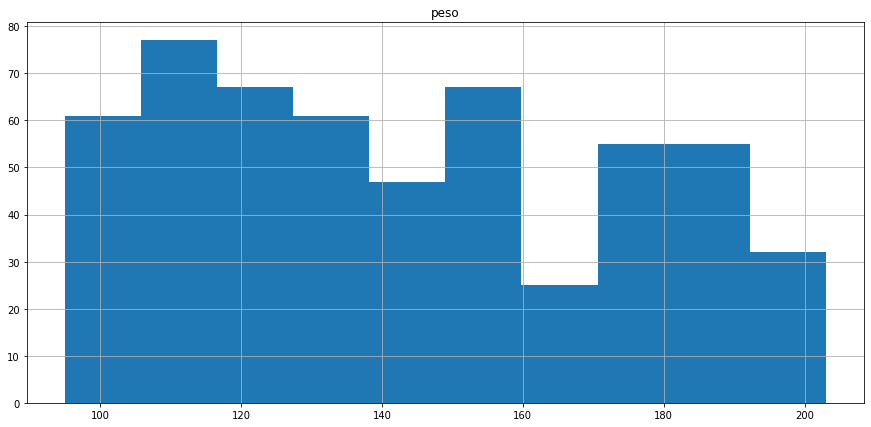

In [60]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

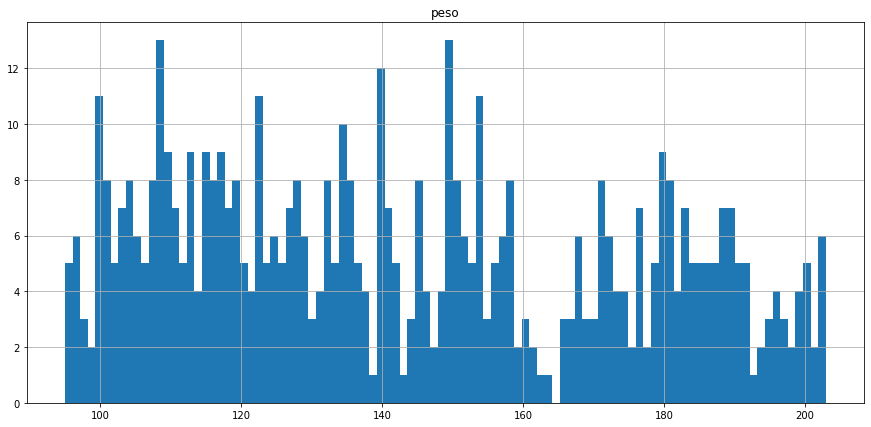

In [61]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

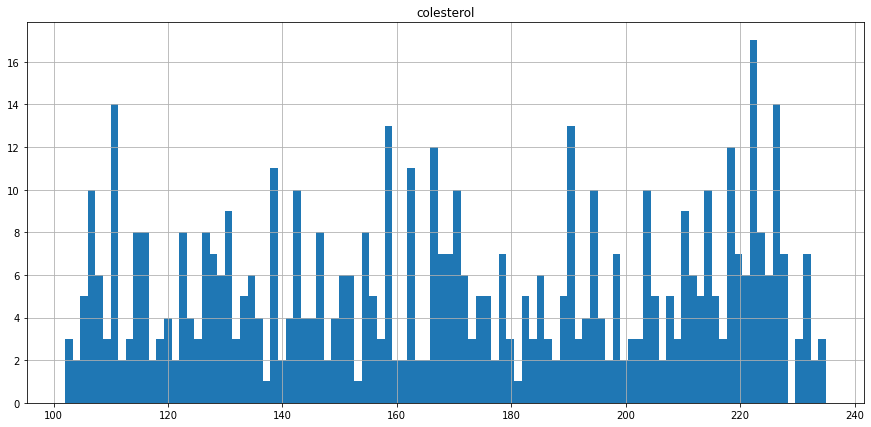

In [62]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [63]:
# Criando um identificador para a variavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [64]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9c15d610>]],
      dtype=object)

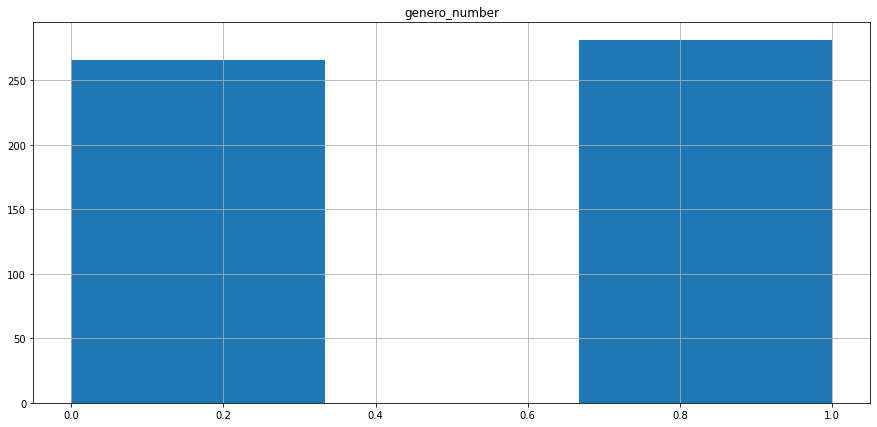

In [65]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

### Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [66]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [67]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [68]:
clientes_estados = pd.merge(clientes, estados, on = 'id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [69]:
# Realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on = 'id_cliente').sort_values('id_cliente')

In [70]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [71]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
543,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
544,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
545,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


### Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [72]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [73]:
# Alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SC
87     SE
       ..
443    RO
478    AC
178    CE
396    RN
123    ES
Name: sigla_estado, Length: 547, dtype: object

In [74]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [75]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


### Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização.

In [76]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
65,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
87,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
478,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
178,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
396,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [77]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop = True)

In [78]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


### Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.
Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas.

### Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessários para realizar o agrupamento

In [91]:
from sklearn.cluster import KMeans

In [92]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [127]:
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158


In [128]:
wcss_clientes = calcular_wcss(dados_cliente)

In [129]:
type(wcss_clientes)

list

In [130]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de 1351248.58500914
O cluster 1 possui valor de WCSS de 332831.3034823859
O cluster 2 possui valor de WCSS de 143043.89980298345
O cluster 3 possui valor de WCSS de 83828.26135639504
O cluster 4 possui valor de WCSS de 56052.52186404086
O cluster 5 possui valor de WCSS de 40041.067317303445
O cluster 6 possui valor de WCSS de 29924.162655750722
O cluster 7 possui valor de WCSS de 24342.32881110678
O cluster 8 possui valor de WCSS de 19410.53617245728
O cluster 9 possui valor de WCSS de 16871.835796817842


In [131]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X = dados_cliente)
kmeans.inertia_

83650.53738346582

### Visualizando o gráfico do cotovelo

In [132]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de graficos

In [133]:
grafico_wcss = px.line(x = range(1,11), 
                       y = wcss_clientes
                       )
fig = go.Figure(grafico_wcss)
fig.update_layout(title = 'Calculando o WCSS', 
                  xaxis_title = 'Número de clusters',
                  yaxis_title = 'Valor do wcss',
                  template = 'plotly_white'
                  )
fig.show()

In [134]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [135]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3
...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3


### Calcula os centroides de cada cluster

In [191]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[154.27027027, 189.82882883],
       [107.39864865, 120.56081081],
       [185.02758621, 219.6137931 ],
       [130.04895105, 157.12587413]])

In [185]:
centroides_clusters[:,0]

array([154.27027027, 107.39864865, 185.02758621, 130.04895105])

In [186]:
centroides_clusters[:,1]

array([189.82882883, 120.56081081, 219.6137931 , 157.12587413])

Aqui temos os centroides dos 4 clusters de acordo com os atributos. Nesse exemplo vemos os centroides de 'peso', 'colesterol' respectivamente.

In [137]:
dados_cliente

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158
...,...,...
542,172.0,207
543,129.0,157
544,107.0,115
545,117.0,147


In [196]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

ValueError: ignored

### Visualizando e alterando layout do gráfico

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'peso',
                  )
fig.show()

### Criando Função para gerar gráficos

In [ ]:
def plotar_grafico(x, y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])
  fig = go.Figure(grafico)

  fig.update_layout(title = 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,
                    )
  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

### Segmentando os clientes baseado na análise dos clusters
Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.
Vamos agrupar em 3 tipos:
  Alto risco: Peso e colesterol altos
  Baixo risco: Baixo peso e colesterol baixo
  Moderado risco: peso e colesterol medianos

In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [144]:
cluster_clientes = base_completa

In [158]:
# Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Risco Moderado alto'
cluster_clientes.loc[cluster_clientes['cluster'] == 3, 'nome_cluster'] = 'Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Baixo Risco'

In [159]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3,Risco Moderado baixo
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3,Risco Moderado baixo
...,...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2,Alto Risco
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3,Risco Moderado baixo
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1,Baixo Risco
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3,Risco Moderado baixo


### Análises dos clusters criados

In [160]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,145.0,42.848276,15.261303,16.0,31.0,42.0,56.0,69.0
Baixo Risco,148.0,43.209459,15.583985,17.0,30.0,41.5,58.0,70.0
Risco Moderado alto,110.0,42.554545,15.783272,16.0,29.0,44.5,55.0,70.0
Risco Moderado baixo,144.0,42.486111,14.252953,16.0,31.0,42.0,54.0,70.0


In [163]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,145,27,Distrito Federal,9
Baixo Risco,148,27,Amazonas,11
Risco Moderado alto,110,27,Minas Gerais,8
Risco Moderado baixo,144,27,Piauí,10


### Pergunta 9

In [187]:
centroides_clusters

array([[154.27027027, 189.82882883],
       [107.39864865, 120.56081081],
       [185.02758621, 219.6137931 ],
       [130.04895105, 157.12587413]])

### Pergunta 10

In [182]:
cluster_clientes.groupby('nome_cluster')['idade'].mean()

nome_cluster
Alto Risco              42.848276
Baixo Risco             43.209459
Risco Moderado alto     42.554545
Risco Moderado baixo    42.486111
Name: idade, dtype: float64

### Pergunta 11

In [181]:
cluster_clientes.groupby('nome_cluster')['colesterol'].min()

nome_cluster
Alto Risco              204
Baixo Risco             102
Risco Moderado alto     172
Risco Moderado baixo    139
Name: colesterol, dtype: int64

### Pergunta 12

In [180]:
cluster_clientes.groupby('nome_cluster')['peso'].max()

nome_cluster
Alto Risco              203.0
Baixo Risco             120.0
Risco Moderado alto     170.0
Risco Moderado baixo    145.0
Name: peso, dtype: float64

### Pergunta 13

In [164]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Sergipe"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
229,230,Feminino,56,180.0,212,26,Sergipe,SE,Brasil,2,Alto Risco
273,274,Feminino,58,197.0,224,26,Sergipe,SE,Brasil,2,Alto Risco
276,277,Masculino,50,185.0,219,26,Sergipe,SE,Brasil,2,Alto Risco
475,476,Feminino,45,182.0,221,26,Sergipe,SE,Brasil,2,Alto Risco


In [165]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Rio de Janeiro"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
158,159,Feminino,58,196.0,225,19,Rio de Janeiro,RJ,Brasil,2,Alto Risco
172,173,Feminino,57,171.0,211,19,Rio de Janeiro,RJ,Brasil,2,Alto Risco
354,355,Masculino,29,188.0,223,19,Rio de Janeiro,RJ,Brasil,2,Alto Risco
367,368,Masculino,38,203.0,228,19,Rio de Janeiro,RJ,Brasil,2,Alto Risco
389,390,Masculino,48,174.0,208,19,Rio de Janeiro,RJ,Brasil,2,Alto Risco


In [166]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Amazonas"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
120,121,Masculino,60,203.0,232,4,Amazonas,AM,Brasil,2,Alto Risco
161,162,Masculino,24,186.0,220,4,Amazonas,AM,Brasil,2,Alto Risco
270,271,Masculino,55,200.0,232,4,Amazonas,AM,Brasil,2,Alto Risco
307,308,Feminino,16,188.0,220,4,Amazonas,AM,Brasil,2,Alto Risco
321,322,Feminino,41,190.0,226,4,Amazonas,AM,Brasil,2,Alto Risco
370,371,Feminino,56,186.0,219,4,Amazonas,AM,Brasil,2,Alto Risco
506,507,Masculino,34,185.0,226,4,Amazonas,AM,Brasil,2,Alto Risco


In [170]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Distrito Federal"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
46,47,Masculino,68,183.0,218,7,Distrito Federal,DF,Brasil,2,Alto Risco
57,58,Feminino,39,170.0,208,7,Distrito Federal,DF,Brasil,2,Alto Risco
123,124,Feminino,28,192.0,228,7,Distrito Federal,DF,Brasil,2,Alto Risco
130,131,Feminino,21,183.0,213,7,Distrito Federal,DF,Brasil,2,Alto Risco
132,133,Masculino,69,173.0,208,7,Distrito Federal,DF,Brasil,2,Alto Risco
224,225,Masculino,57,176.0,212,7,Distrito Federal,DF,Brasil,2,Alto Risco
238,239,Feminino,34,195.0,231,7,Distrito Federal,DF,Brasil,2,Alto Risco
269,270,Masculino,60,168.0,211,7,Distrito Federal,DF,Brasil,2,Alto Risco
496,497,Masculino,67,200.0,228,7,Distrito Federal,DF,Brasil,2,Alto Risco


### Pergunta 14

In [177]:
cluster_clientes.groupby('nome_cluster')['peso'].mean()

nome_cluster
Alto Risco              185.027586
Baixo Risco             107.398649
Risco Moderado alto     154.363636
Risco Moderado baixo    130.145833
Name: peso, dtype: float64

### Pergunta 15

In [172]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    61.0  221.000000   6.080022  208.0  217.00   
                     Masculino   84.0  218.607143   8.523558  204.0  211.75   
Baixo Risco          Feminino    66.0  122.712121  10.423000  102.0  113.00   
                     Masculino   82.0  118.829268  10.772398  102.0  110.00   
Risco Moderado alto  Feminino    55.0  190.836364   9.772910  172.0  185.50   
                     Masculino   55.0  189.145455  10.142354  172.0  180.00   
Risco Moderado baixo Feminino    84.0  159.190476   9.984900  140.0  150.75   
                     Masculino   60.0  154.483333   9.594299  139.0  145.00   

                                  50%     75%    max  
nome_cluster         genero                           
Alto Risco           Feminino   221.0  225.00  235.0  
                     Masculino  219.0  225.25  235.0  
Baixo Risco          Feminino   125.0  130.75  138.0  
                     Masculino  116.0  128.00  139.0  
Risco Moderado alto  Feminino   191.0  196.00  230.0  
                     Masculino  188.0  199.00  211.0  
Risco Moderado baixo Feminino   161.5  168.00  174.0  
                     Masculino  155.5  162.00  173.0

### Exportando dados

In [ ]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding = 'latin1')

Me chamo Oldair
Sou de nova serrana, 
Sistemas de informação Unipac Bom Despacho - 
Trabalho no TJMG tem 8 anos como analista de sistemas (trabalho muito com banco de dados)
Mercado financeiro